In [5]:
import easyocr
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager as fm

reader = easyocr.Reader(['ru'], gpu=False)

# Загрузка шрифта, предустановленного в системе
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]
font = ImageFont.truetype(font_path, 20)

Using CPU. Note: This module is much faster with a GPU.


Распознанный текст:
ПАСПОРТ ОБЪЕКТА
КУЛЬТУРА
НАЦМОНАЛЫНЫЕ
ПРШЕКТЫ
Р@ССШМ
НАИМЕНОВАНИЕ ОБЪЕКТА:
кСтроительство Центра Культурного Развитиях
АДРЕС:
ОРГАН ГОСУДАРСТВЕННОГО
Саратовская область  Балаковский муниципальный
СТРОИТЕЛЬНОГО НАДЗОРА:
район; г п. город Балаково
Балаково, ул
Управление Государственного строительного
Саратовское шоссе, з/у 76/4
надзора министерства и жилищно-
коммунального хозяйства Саратовской
ЗАКАЗЧИК:
области
Отдел по культуре администрации Балаковского
муниципального района Саратовской области
ТЕХНИЧЕСКИЙ НАДЗОР:
00О кДирекция капитального строительствая
НАЧАЛЬНИК:
Дерябин Вячеслав Викторович, тел : 8 (8453) 37-48-33
АВТОРСКИЙ НАДЗОР:
РАЗРЕШЕНИЕ НА СТРОИТЕЛЬСТВО:
ООО кЭнергопромпроект
09 64-8064505101-1367/С-2022 от 23.06.2022
ГЕНЕРАЛЬНЫЙ ПОДРЯДЧИК:
СРОКИ СТРОИТЕЛЬСТВА:
0ОО
ТРЕСТ 7>
Начало строительства
2022 год
Директор: Кузнецов Алексей Юрьевич
Окончание строительства
2023 год
Тел : 8 937-146-62-52


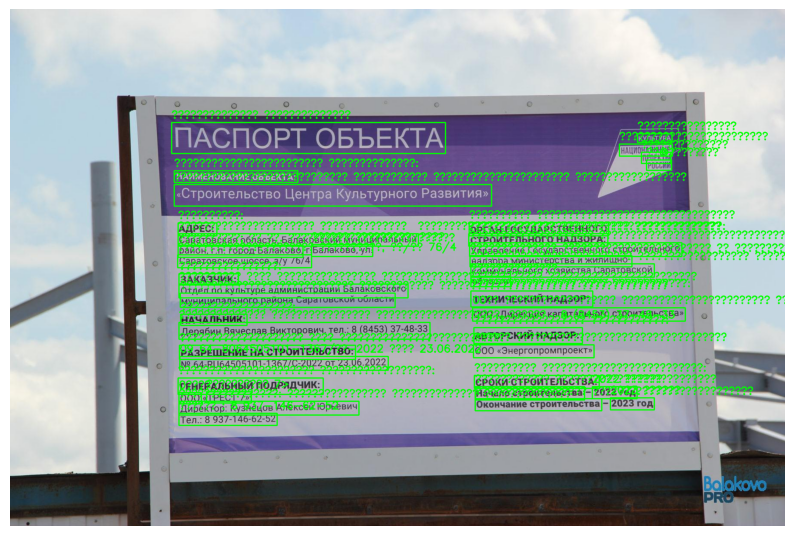

In [4]:
cur_path = '/Users/dmitrykutsenko/Desktop/hack_22_06_24_school_of_programming/data/original/culture/Примеры корректного брендирования'

for path in os.listdir(cur_path):
    image = cv2.imread(f'{cur_path}/{path}')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    # preprocessed_image_path = 'path/to/save/preprocessed_image.png'
    # cv2.imwrite(preprocessed_image_path, gray)

    result = reader.readtext(gray)


    print("Распознанный текст:")
    for res in result:
        print(res[1])


    for (bbox, text, prob) in result:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(val) for val in top_left])
        top_right = tuple([int(val) for val in top_right])
        bottom_right = tuple([int(val) for val in bottom_right])
        bottom_left = tuple([int(val) for val in bottom_left])

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), 0.8, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    break

In [ ]:
result = reader.readtext(gray)

# Отображение распознанного текста
print("Распознанный текст:")
for res in result:
    print(res[1])

# Отображение изображения с распознанным текстом
for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(val) for val in top_left])
    top_right = tuple([int(val) for val in top_right])
    bottom_right = tuple([int(val) for val in bottom_right])
    bottom_left = tuple([int(val) for val in bottom_left])

    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Отображение изображения с результатами
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def add_text_to_image(image_path, text, output_path, position=(50, 50), font_size=40):
    # Загрузка изображения с помощью OpenCV
    image = cv2.imread(image_path)
    
    # Конвертация изображения в формат PIL
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Создание объекта для рисования
    draw = ImageDraw.Draw(image_pil)
    
    # Загрузка шрифта, предустановленного в системе
    font_path = "arial.ttf"  # Убедитесь, что путь к шрифту правильный
    font = ImageFont.truetype(font_path, font_size)
    
    # Добавление текста на изображение
    draw.text(position, text, font=font, fill=(255, 0, 0))
    
    # Конвертация изображения обратно в формат OpenCV
    image_with_text = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
    
    # Сохранение результата
    cv2.imwrite(output_path, image_with_text)
    
    # Отображение изображения с результатами
    cv2.imshow('Image with Text', image_with_text)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Пример использования функции
image_path = 'path/to/your/image.jpg'
output_path = 'path/to/save/output_image.jpg'
text = 'Привет, мир!'
add_text_to_image(image_path, text, output_path)
